In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from pr_curve import pr_threshold

Threshold: 0.1 Recall 0.75


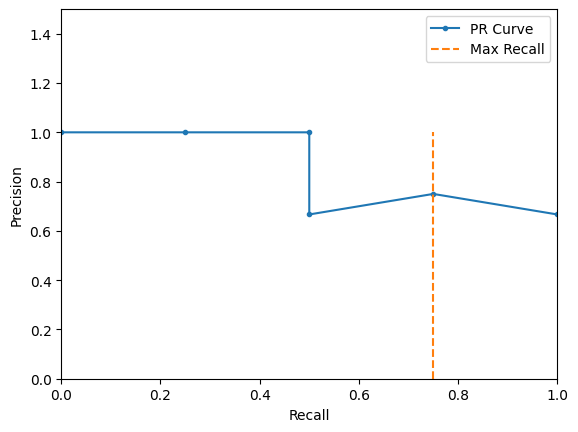

In [13]:
from sklearn.metrics import precision_recall_curve

def plot_pr_curve(
        y_true,
        y_pred,
        max_recall,
):
    """Plots Precision-Recall Curve"""
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    plt.plot(recall, precision, marker='.', label='PR Curve')
    plt.plot([max_recall, max_recall], [0, 1], linestyle='--', label='Max Recall')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim(0, 1)
    plt.ylim(0, 1.5)
    plt.legend()
    plt.show()

y_true = np.array([1, 1, 0, 1, 0, 1])
y_prob = np.array([0.9, 0.7, 0.2, 0.1, 0, 0])
min_precision = 0.7

threshold_proba, max_recall = pr_threshold(y_true, y_prob, min_precision)
print("Threshold:", threshold_proba, "Recall", max_recall)
plot_pr_curve(y_true, y_prob, max_recall)

Threshold: 0.1 Recall 0.75


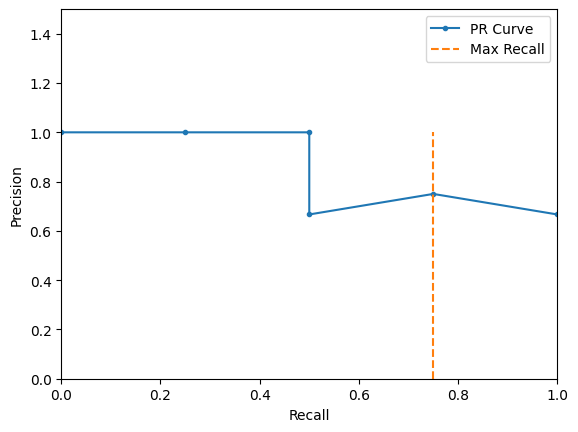

In [16]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
from typing import Tuple

def pr_threshold_fast(
    y_true: np.ndarray,
    y_prob: np.ndarray,
    min_precision: float,
) -> Tuple[float, float]:
    """Returns threshold and recall (from Precision-Recall Curve)"""
    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    max_recall = 0
    threshold_proba = 0
    for i in range(len(precision)):
        if precision[i] >= min_precision and recall[i] > max_recall:
            max_recall = recall[i]
            threshold_proba = thresholds[i]
    
    return threshold_proba, max_recall

threshold_proba, max_recall = pr_threshold_fast(y_true, y_prob, min_precision)
print("Threshold:", threshold_proba, "Recall", max_recall)
plot_pr_curve(y_true, y_prob, max_recall)

[0.  0.  0.1 0.2 0.7 0.9]
[1 2 2 2 2 2]
Threshold: 0.0 Recall 0.5


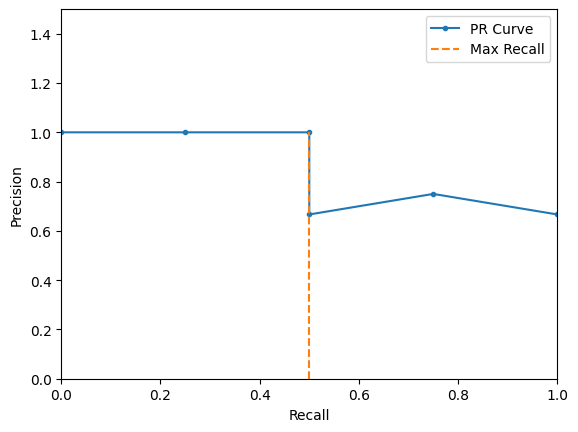

In [20]:

def pr_threshold_fast(y_true: np.ndarray, y_prob: np.ndarray, min_precision: float) -> Tuple[float, float]:
    """Returns threshold and recall (from Precision-Recall Curve)"""
    thresholds = np.sort(y_prob)  # Sort probabilities in ascending order

    # Calculate precision and recall for all thresholds
    print(thresholds)
    tp = np.cumsum((y_true == 1) & (y_prob >= thresholds))
    print(tp)
    fp = np.cumsum((y_true == 0) & (y_prob >= thresholds))
    fn = np.sum(y_true == 1) - tp
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)

    # Find the threshold with the highest recall while maintaining min_precision
    valid_indices = np.where(precision >= min_precision)
    if valid_indices[0].size > 0:
        idx = valid_indices[0][-1]
        threshold_proba = thresholds[idx]
        max_recall = recall[idx]
    else:
        # If no valid threshold is found, return 0 recall
        threshold_proba = 1.0
        max_recall = 0.0

    return threshold_proba, max_recall

threshold_proba, max_recall = pr_threshold_fast(y_true, y_prob, min_precision)
print("Threshold:", threshold_proba, "Recall", max_recall)
plot_pr_curve(y_true, y_prob, max_recall)